**Data Understanding**

Loading and exploring the dataset

In [5]:
# Import essential libraries
import pandas as pd
import numpy as np
%pip install seaborn
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("Train.csv")

# Display dataset info
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19999 entries, 0 to 19998
Data columns (total 32 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          19999 non-null  int64  
 1   Alcohol Consumption         19983 non-null  object 
 2   Cancer Stage                19996 non-null  object 
 3   Country                     19988 non-null  object 
 4   Date of Birth               19987 non-null  object 
 5   Diabetes                    19997 non-null  object 
 6   Diabetes History            19999 non-null  object 
 7   Diet Risk                   19987 non-null  object 
 8   Early Detection             19991 non-null  object 
 9   Family History              19984 non-null  object 
 10  Gender                      19981 non-null  object 
 11  Genetic Mutation            19990 non-null  object 
 12  Healthcare Access           19984 non-null  object 
 13  Healthcare Costs            199

In [11]:
# Check first few rows
print(df.head())

   ID Alcohol Consumption Cancer Stage Country Date of Birth Diabetes  \
0   1                  No    Localized      UK    29-01-1966       No   
1   2                  No     Regional   Japan    21-12-1958       No   
2   3                  No    Localized  France    16-06-1959       No   
3   4                 Yes    Localized   Japan    18-01-1956      Yes   
4   5                  No     Regional     USA      4/5/1975       No   

  Diabetes History Diet Risk Early Detection Family History  ... Non Smoker  \
0               No  Moderate              No             No  ...        Yes   
1               No       Low              No             No  ...         No   
2               No       Low             Yes             No  ...         No   
3               No  Moderate              No             No  ...        Yes   
4               No  Moderate             Yes            Yes  ...        Yes   

  Obesity BMI Physical Activity  Screening History Smoking History  \
0  Overweight   

In [8]:
# Describe numerical features
print(df.describe())

                 ID  Healthcare Costs  Incidence Rate per 100K  \
count  19999.000000      19986.000000             19990.000000   
mean   10000.000000      72293.785129                34.437176   
std     5773.358353      27664.059940                14.532338   
min        1.000000     -69123.238750                10.000000   
25%     5000.500000      48309.000000                22.000000   
50%    10000.000000      72132.000000                34.000000   
75%    14999.500000      96347.750000                47.000000   
max    19999.000000     213690.042700               109.125601   

       Marital Status  Mortality Rate per 100K  Tumor Size (mm)  
count             0.0             19979.000000     19976.000000  
mean              NaN                17.069046        41.977102  
std               NaN                 7.191460        21.753100  
min               NaN                 5.000000         5.000000  
25%               NaN                11.000000        23.000000  
50%      

**Data Cleaning**

In [7]:
# Check missing values
print(df.isnull().sum())

ID                                0
Alcohol Consumption              16
Cancer Stage                      3
Country                          11
Date of Birth                    12
Diabetes                          2
Diabetes History                  0
Diet Risk                        12
Early Detection                   8
Family History                   15
Gender                           18
Genetic Mutation                  9
Healthcare Access                15
Healthcare Costs                 13
Heart Disease History             0
Hypertension                      0
Incidence Rate per 100K           9
Inflammatory Bowel Disease        9
Insurance Costs                   0
Insurance Status                 15
Marital Status                19999
Mortality Rate per 100K          20
Non Smoker                        0
Obesity BMI                       2
Physical Activity                15
Screening History                 9
Smoking History                  11
Transfusion History         

In [12]:
# Drop unnecessary columns
# ID' is a unique identifier, not useful for prediction
# 'Marital Status' is completely empty
df.drop(['ID', 'Marital Status'], axis=1, inplace=True)

In [13]:
# Display dataset info
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19999 entries, 0 to 19998
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Alcohol Consumption         19983 non-null  object 
 1   Cancer Stage                19996 non-null  object 
 2   Country                     19988 non-null  object 
 3   Date of Birth               19987 non-null  object 
 4   Diabetes                    19997 non-null  object 
 5   Diabetes History            19999 non-null  object 
 6   Diet Risk                   19987 non-null  object 
 7   Early Detection             19991 non-null  object 
 8   Family History              19984 non-null  object 
 9   Gender                      19981 non-null  object 
 10  Genetic Mutation            19990 non-null  object 
 11  Healthcare Access           19984 non-null  object 
 12  Healthcare Costs            19986 non-null  float64
 13  Heart Disease History       199

**Fill missing values**

In [14]:
# Fill numerical columns with their mean
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
for col in numerical_cols:
    df[col] = df[col].fillna(df[col].mean())

In [15]:
# Fill categorical columns with their most frequent value (mode)
categorical_cols = df.select_dtypes(include='object').columns
for col in categorical_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

In [16]:
# Recheck missing values
print("\nMissing values after cleaning:", df.isnull().sum().sum()) 


Missing values after cleaning: 0


In [17]:
# Preview cleaned data
print("\nPreview of cleaned data:")
print(df.head())

# Save cleaned data
df.to_csv("Cleaned_Train.csv", index=False) 


Preview of cleaned data:
  Alcohol Consumption Cancer Stage Country Date of Birth Diabetes  \
0                  No    Localized      UK    29-01-1966       No   
1                  No     Regional   Japan    21-12-1958       No   
2                  No    Localized  France    16-06-1959       No   
3                 Yes    Localized   Japan    18-01-1956      Yes   
4                  No     Regional     USA      4/5/1975       No   

  Diabetes History Diet Risk Early Detection Family History Gender  ...  \
0               No  Moderate              No             No      M  ...   
1               No       Low              No             No      M  ...   
2               No       Low             Yes             No      M  ...   
3               No  Moderate              No             No      M  ...   
4               No  Moderate             Yes            Yes      M  ...   

  Non Smoker Obesity BMI  Physical Activity Screening History Smoking History  \
0        Yes  Overweight   

**Missing Value Heatmap**

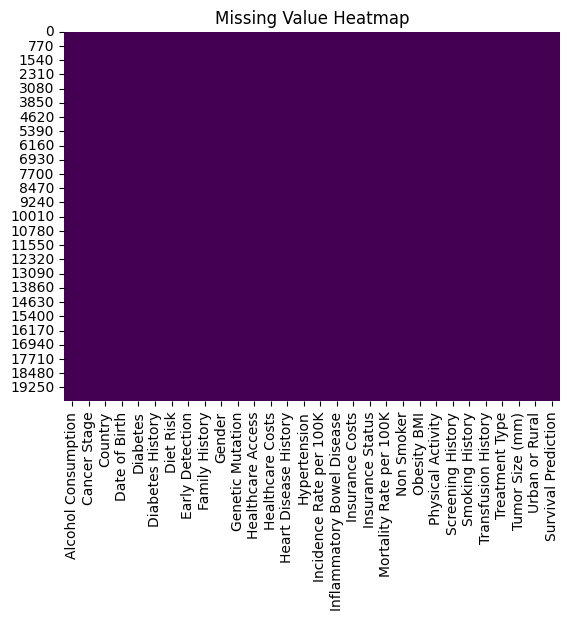

In [18]:
# Visualize missing values BEFORE cleaning 
sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Value Heatmap")
plt.show()

In [19]:
# Print summary statistics
print("\nSummary Statistics:")
print(df.describe(include='all'))


Summary Statistics:
       Alcohol Consumption Cancer Stage Country Date of Birth Diabetes  \
count                19999        19999   19999         19999    19999   
unique                   2            3      16          9029        2   
top                    Yes     Regional     USA      2/2/1949       No   
freq                 10039         8037    3123            21    16041   
mean                   NaN          NaN     NaN           NaN      NaN   
std                    NaN          NaN     NaN           NaN      NaN   
min                    NaN          NaN     NaN           NaN      NaN   
25%                    NaN          NaN     NaN           NaN      NaN   
50%                    NaN          NaN     NaN           NaN      NaN   
75%                    NaN          NaN     NaN           NaN      NaN   
max                    NaN          NaN     NaN           NaN      NaN   

       Diabetes History Diet Risk Early Detection Family History Gender  ...  \
count     

**Exploratory Data Analysis (EDA)**

Shape: (19999, 30)

Data Types:
 Alcohol Consumption            object
Cancer Stage                   object
Country                        object
Date of Birth                  object
Diabetes                       object
Diabetes History               object
Diet Risk                      object
Early Detection                object
Family History                 object
Gender                         object
Genetic Mutation               object
Healthcare Access              object
Healthcare Costs              float64
Heart Disease History          object
Hypertension                   object
Incidence Rate per 100K       float64
Inflammatory Bowel Disease     object
Insurance Costs                object
Insurance Status               object
Mortality Rate per 100K       float64
Non Smoker                     object
Obesity BMI                    object
Physical Activity              object
Screening History              object
Smoking History                object
Transfusion Histo

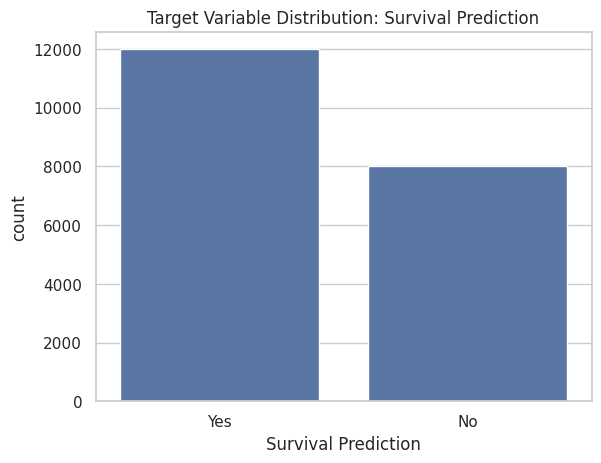

In [20]:
# Set Seaborn style
sns.set(style="whitegrid")

# STEP 1: Basic Info
print("Shape:", df.shape)
print("\nData Types:\n", df.dtypes)

# STEP 2: Target Variable Distribution
sns.countplot(x="Survival Prediction", data=df)
plt.title("Target Variable Distribution: Survival Prediction")
plt.show()

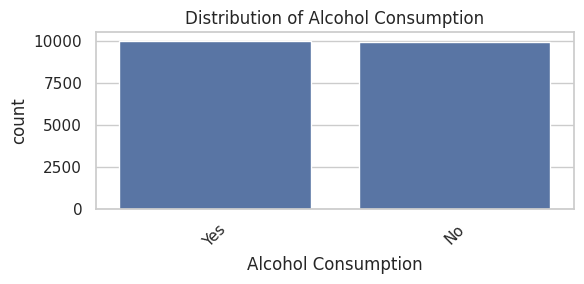

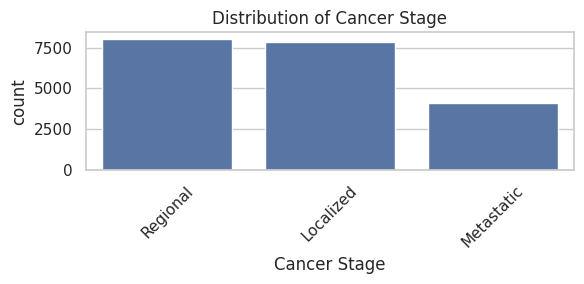

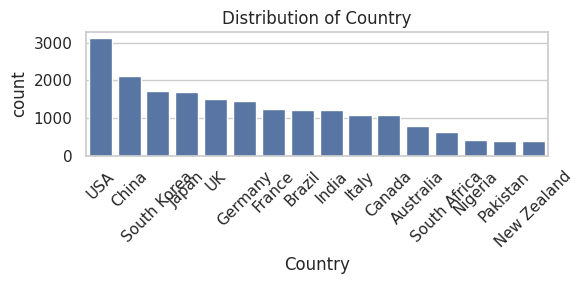

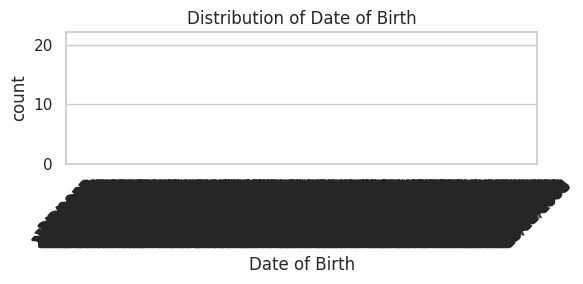

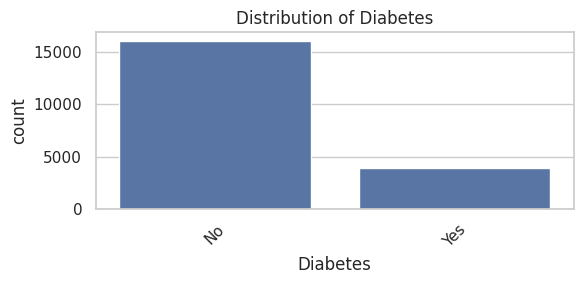

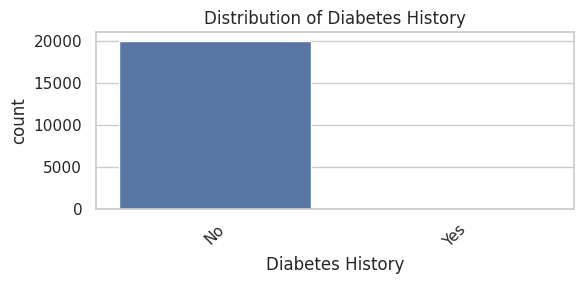

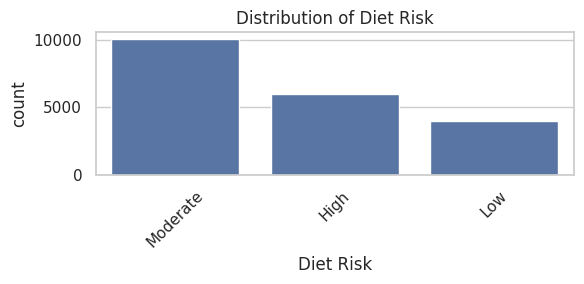

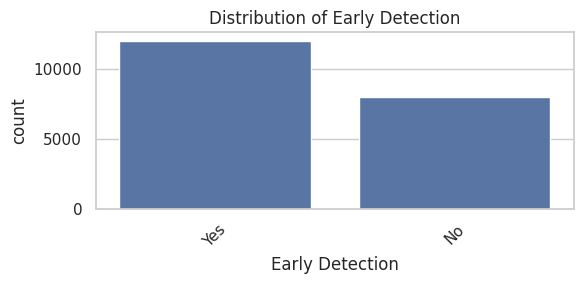

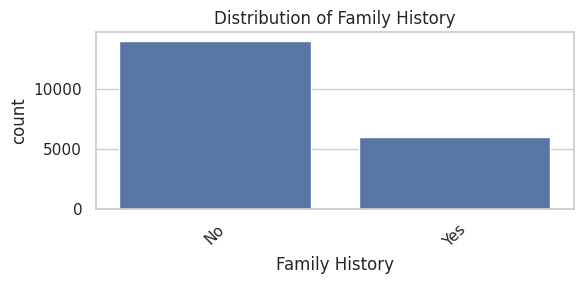

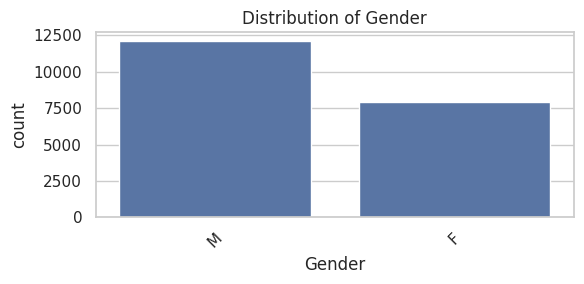

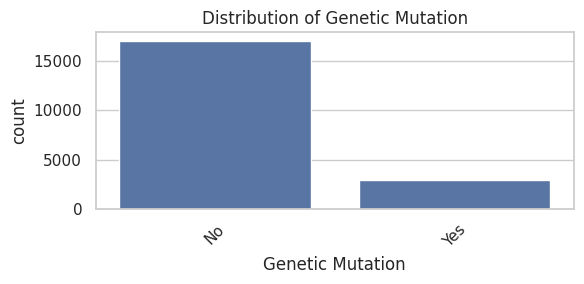

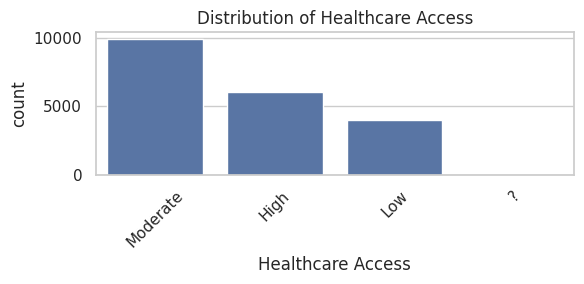

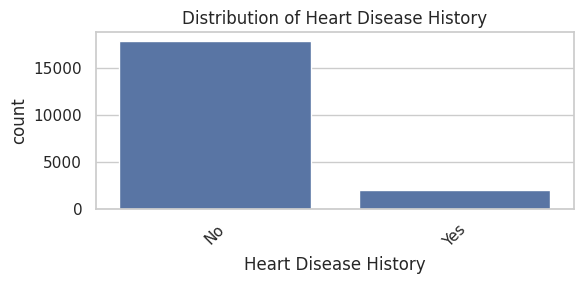

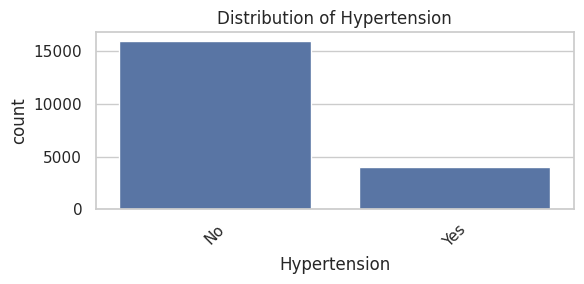

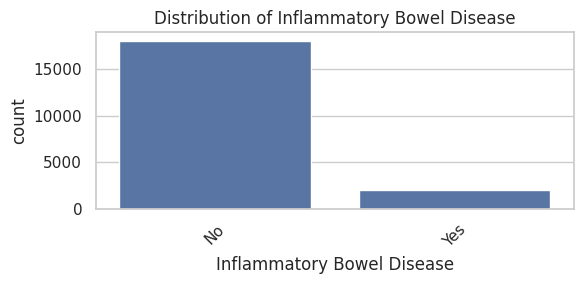

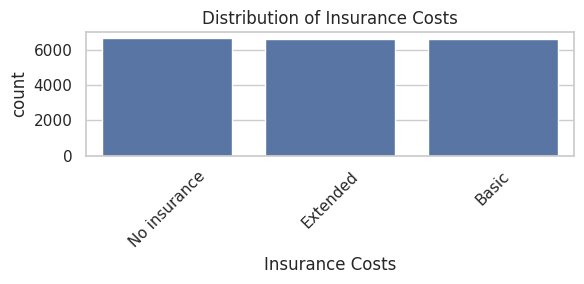

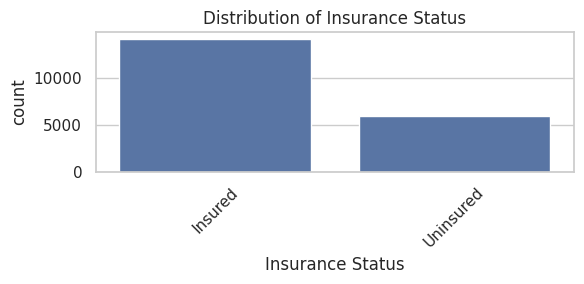

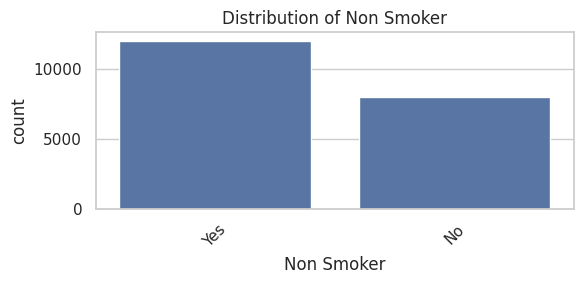

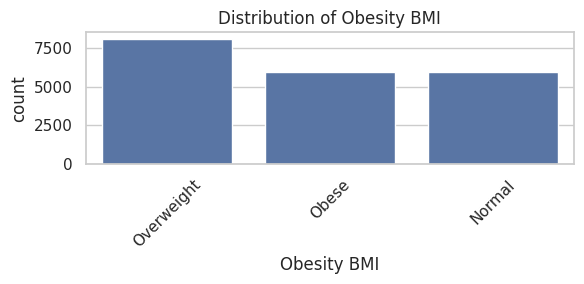

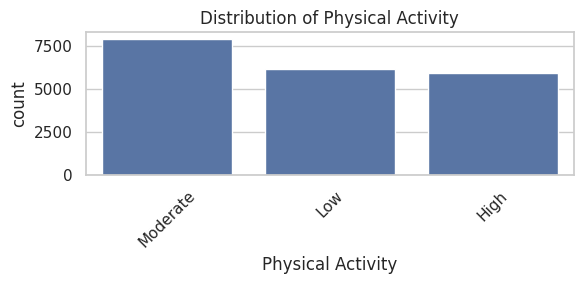

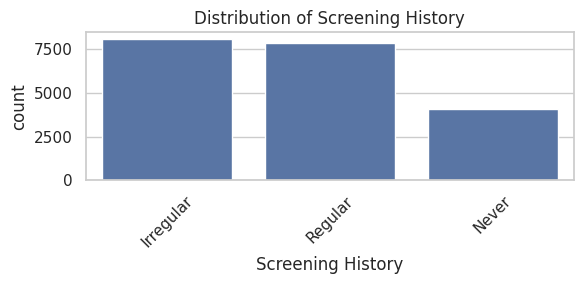

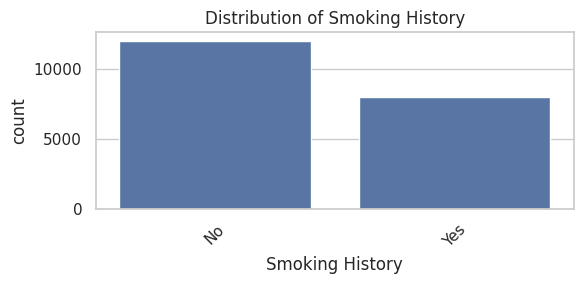

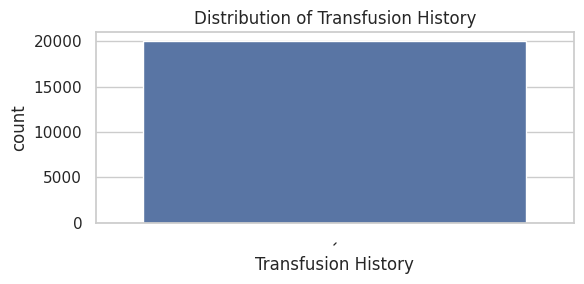

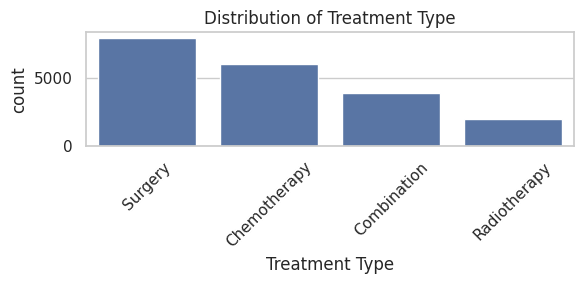

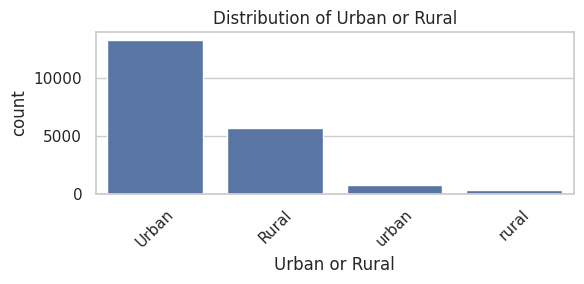

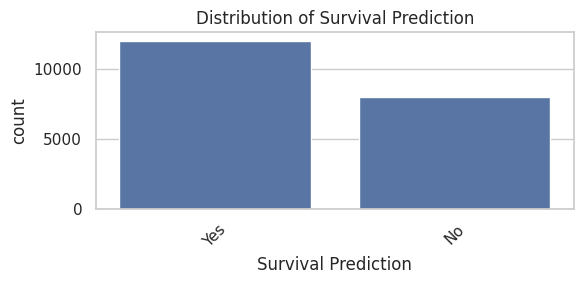

In [21]:
# STEP 3: Univariate Analysis - Categorical
categorical_cols = df.select_dtypes(include='object').columns

for col in categorical_cols:
    plt.figure(figsize=(6, 3))
    sns.countplot(data=df, x=col, order=df[col].value_counts().index)
    plt.xticks(rotation=45)
    plt.title(f'Distribution of {col}')
    plt.tight_layout()
    plt.show()

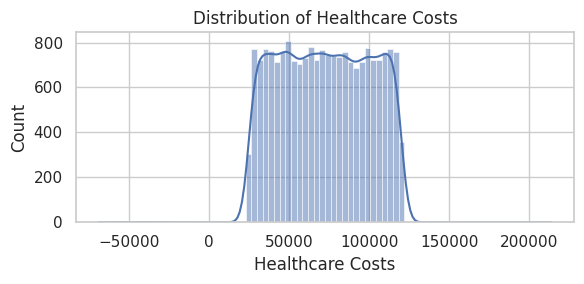

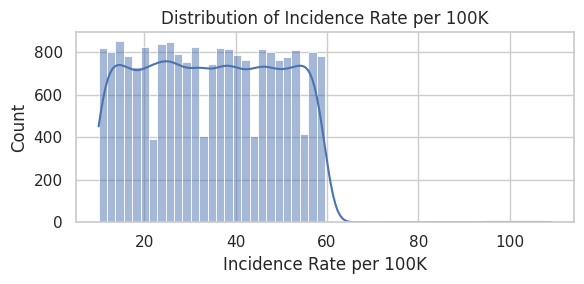

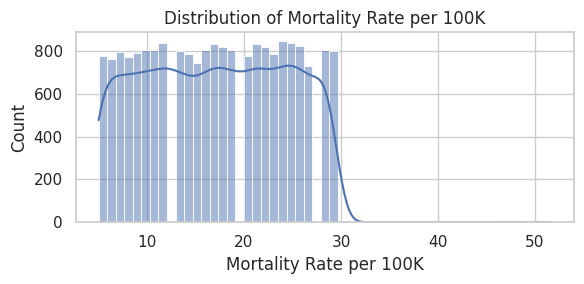

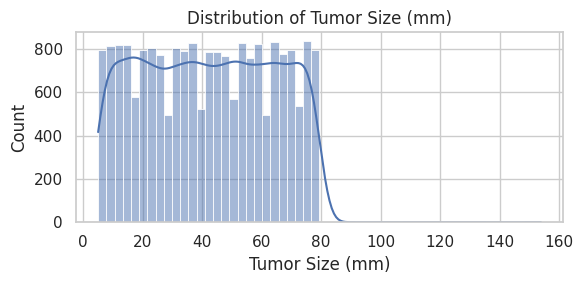

In [22]:
# STEP 4: Univariate Analysis - Numerical
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns

for col in numerical_cols:
    plt.figure(figsize=(6, 3))
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.tight_layout()
    plt.show()

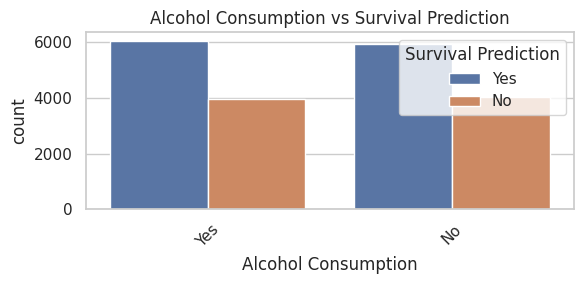

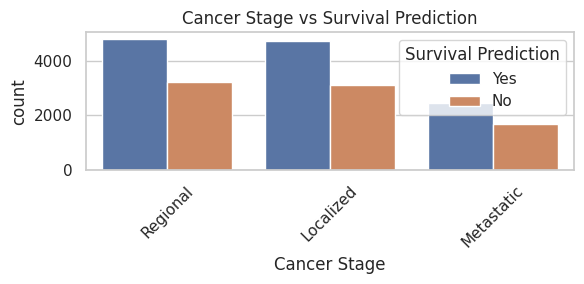

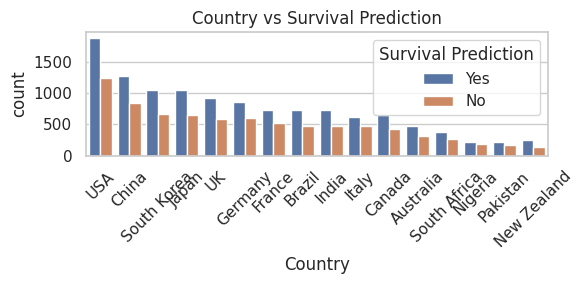

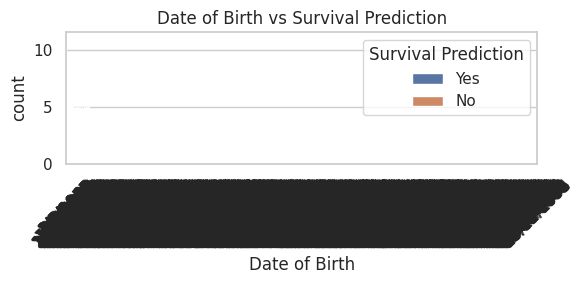

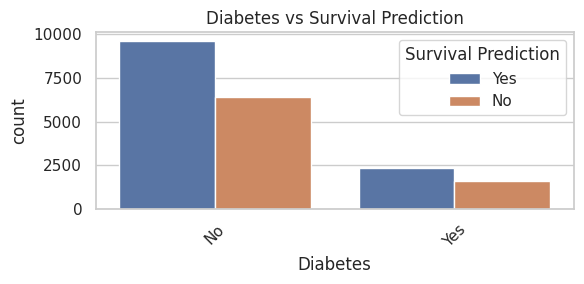

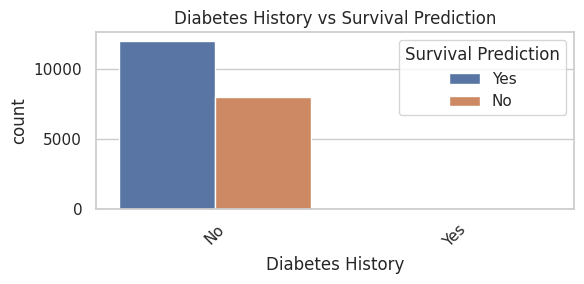

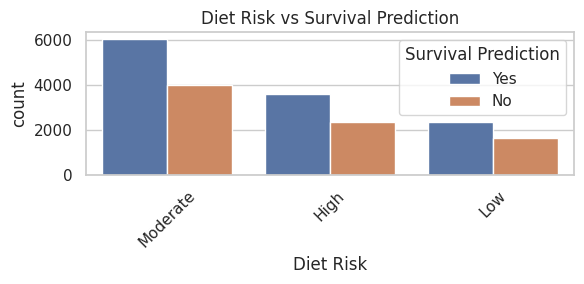

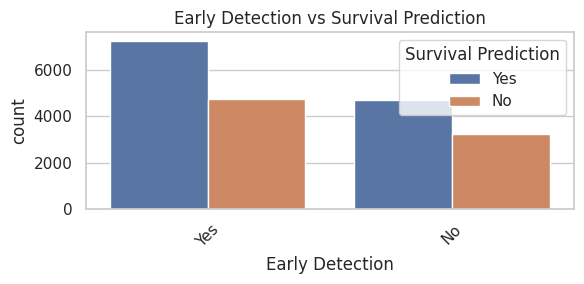

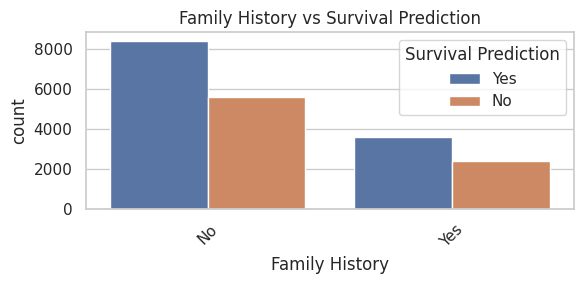

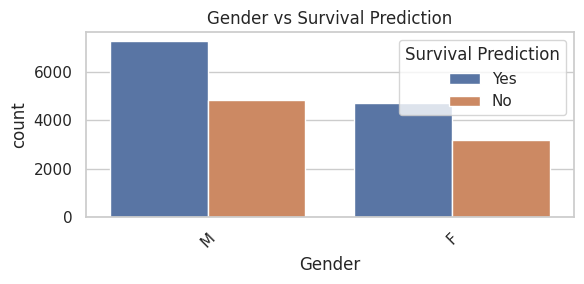

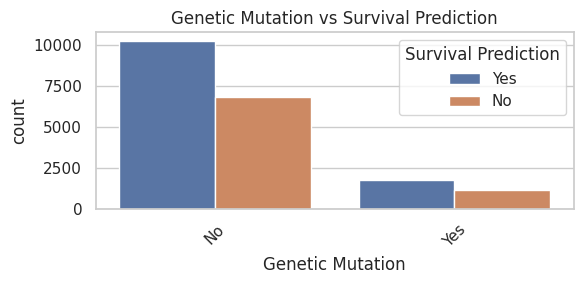

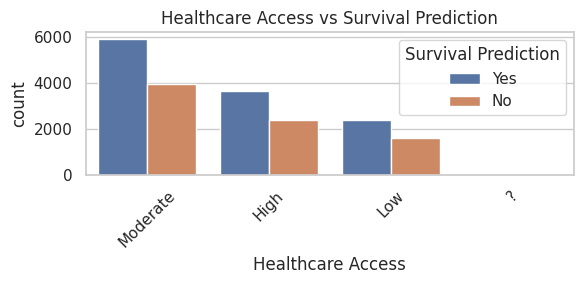

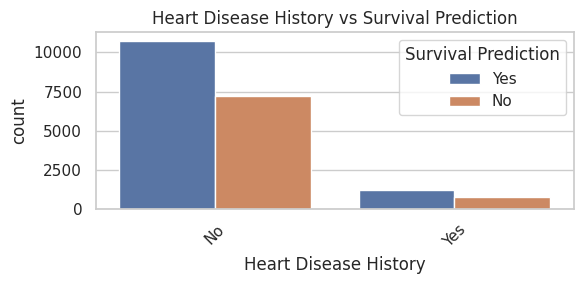

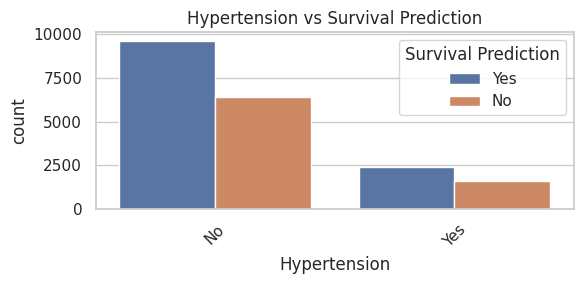

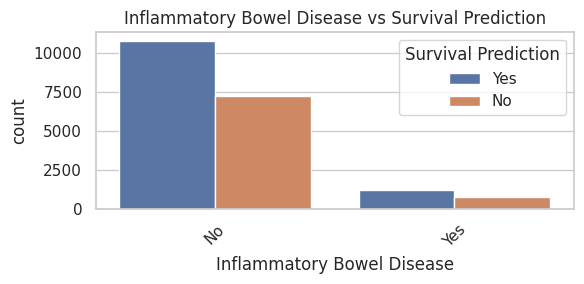

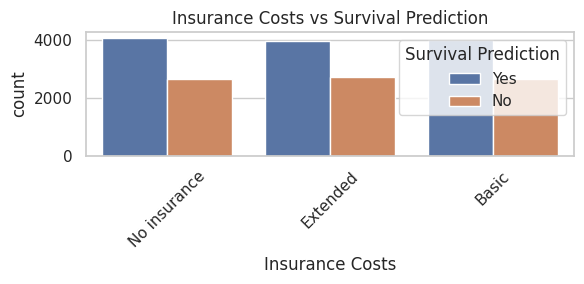

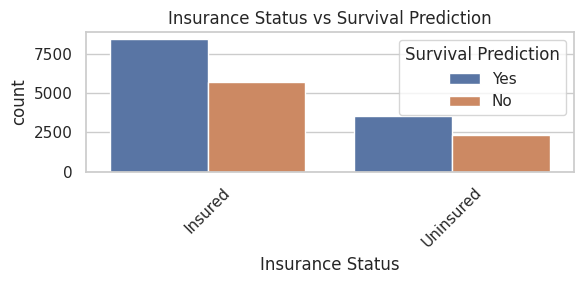

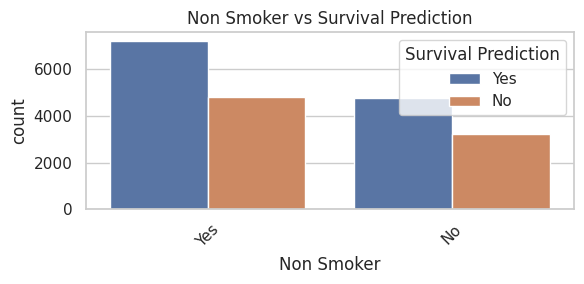

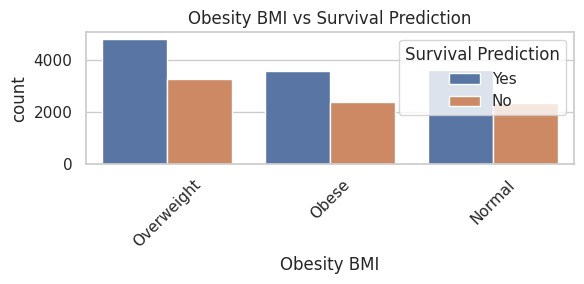

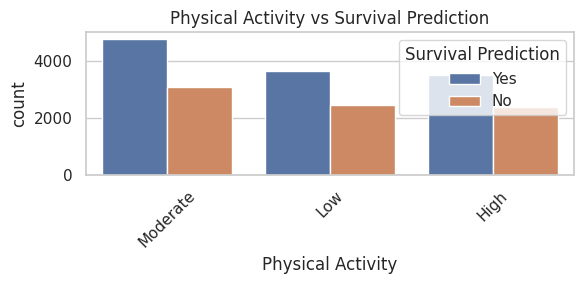

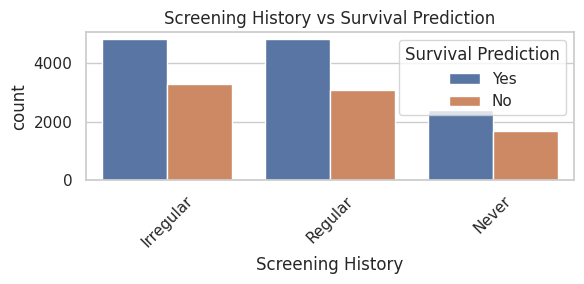

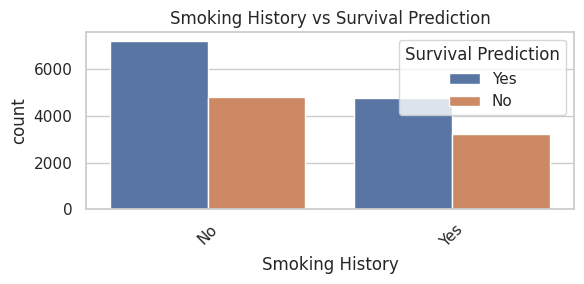

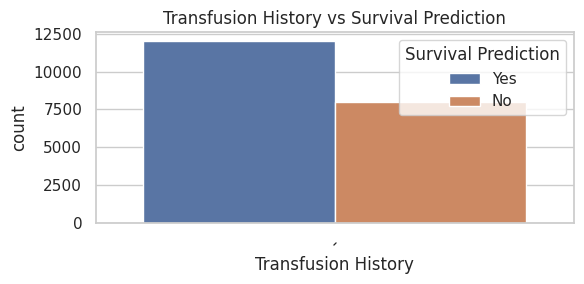

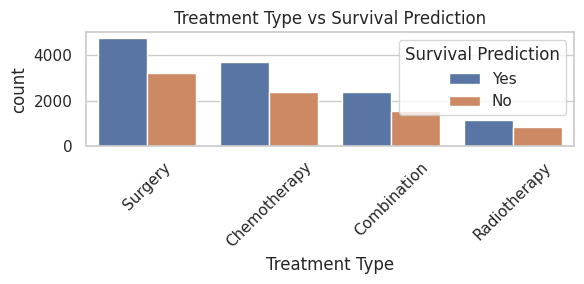

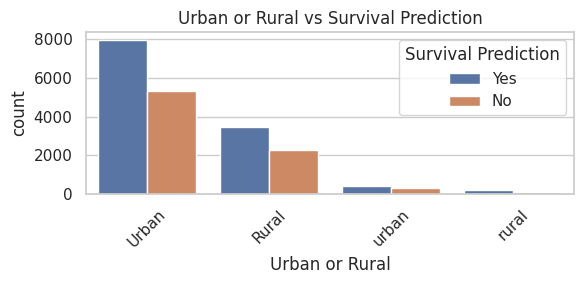

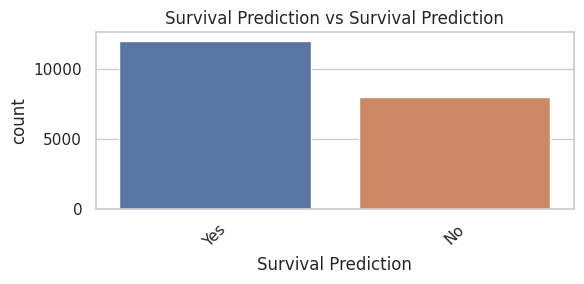

In [23]:
# STEP 5: Bivariate Analysis - Target vs Categorical
for col in categorical_cols:
    plt.figure(figsize=(6, 3))
    sns.countplot(data=df, x=col, hue="Survival Prediction", order=df[col].value_counts().index)
    plt.xticks(rotation=45)
    plt.title(f'{col} vs Survival Prediction')
    plt.tight_layout()
    plt.show()

**Correlation Heatmap**

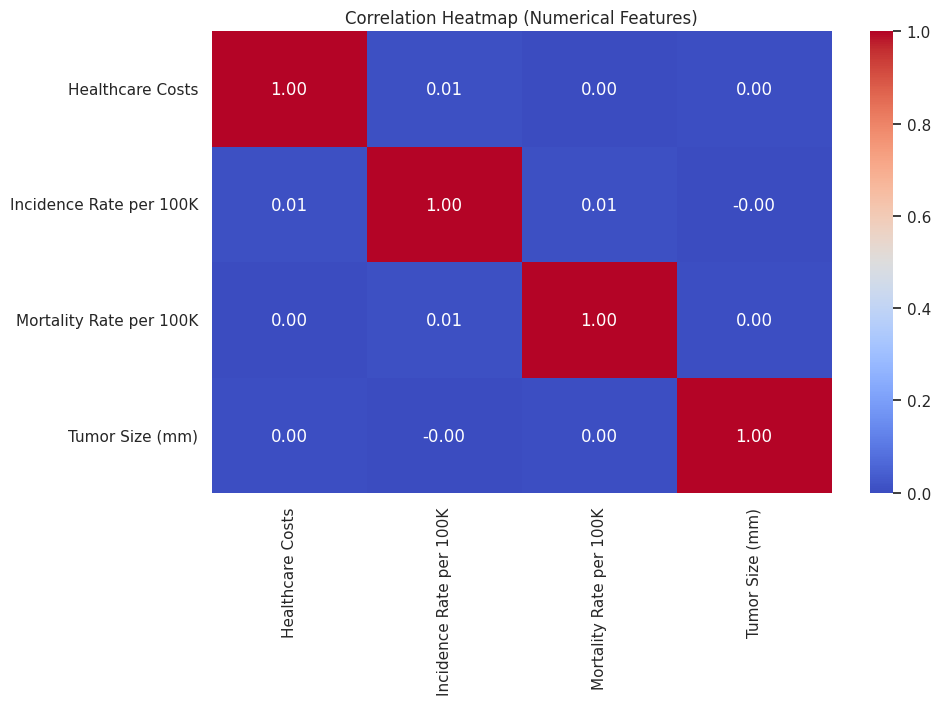

In [24]:
# STEP 6: Correlation Heatmap (Numerical Only)
plt.figure(figsize=(10, 6))
corr = df[numerical_cols].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap (Numerical Features)")
plt.show()

**Plot Histogram**

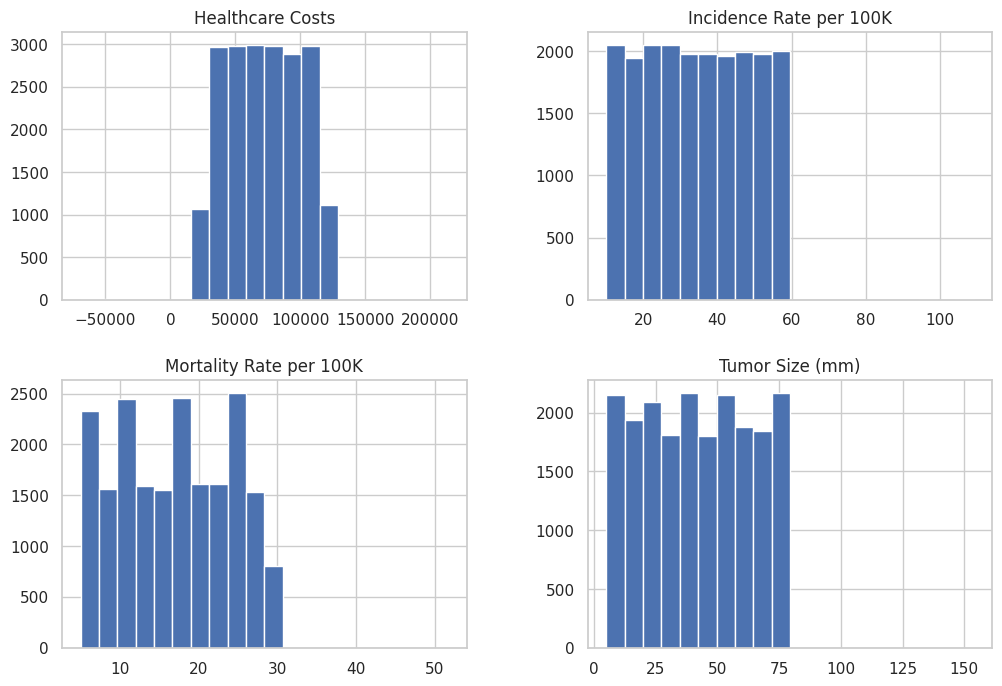

In [25]:
# Plot histogram for numerical features
df.hist(figsize=(12, 8), bins=20)
plt.show()

**Feature Engineering & Feature Selection**

1.Feature Engineering

In [29]:
from datetime import datetime
df = pd.read_csv("Train.csv")

# Convert Date of Birth to datetime
df['Date of Birth'] = pd.to_datetime(df['Date of Birth'], errors='coerce', dayfirst=True)

# Create Age column
df['Age'] = 2025 - df['Date of Birth'].dt.year

# Drop the old column
df.drop('Date of Birth', axis=1, inplace=True)

# Check the result
print(df[['Age']].head())

    Age
0  59.0
1  67.0
2  66.0
3  69.0
4   NaN


2. Encode Categorical Variables

In [30]:
from sklearn.preprocessing import LabelEncoder

label_enc = LabelEncoder()
df['Survival Prediction'] = label_enc.fit_transform(df['Survival Prediction'])  # Yes=1, No=0

In [32]:
df = pd.get_dummies(df, drop_first=True)  # Avoids dummy variable trap

**Feature Selection**

In [33]:
# Correlation with target
correlation = df.corr()['Survival Prediction'].sort_values(ascending=False)
print(correlation)

# For example, keep top features manually
selected_features = correlation[1:10].index.tolist()  # Top 9 after target

Survival Prediction               1.000000
Screening History_Regular         0.016196
Early Detection_Yes               0.012844
Country_Japan                     0.012054
Country_New Zealand               0.011919
Inflammatory Bowel Disease_Yes    0.011096
Physical Activity_Moderate        0.009843
Tumor Size (mm)                   0.008479
Heart Disease History_Yes         0.008040
Insurance Costs_No insurance      0.007629
Country_UK                        0.007479
Alcohol Consumption_Yes           0.007227
Country_South Korea               0.007225
Insurance Status_Uninsured        0.005621
Healthcare Access_High            0.004249
Gender_M                          0.003267
Non Smoker_Yes                    0.002885
Country_India                     0.002692
Treatment Type_Combination        0.002482
Country_China                     0.002213
Country_USA                       0.001826
Country_Brazil                    0.001316
Genetic Mutation_Yes              0.001167
Diet Risk_M

**Embedded Method (using feature importance from a model)**

In [34]:
from sklearn.ensemble import RandomForestClassifier

# Separate features and target
X = df.drop('Survival Prediction', axis=1)
y = df['Survival Prediction']

# Fit model
rf = RandomForestClassifier()
rf.fit(X, y)

# Feature importance
importances = pd.Series(rf.feature_importances_, index=X.columns)
important_features = importances.sort_values(ascending=False).head(10)
print("Top 10 important features:")
print(important_features)

Top 10 important features:
ID                         0.093504
Healthcare Costs           0.093240
Tumor Size (mm)            0.083654
Incidence Rate per 100K    0.079085
Mortality Rate per 100K    0.071652
Age                        0.069674
Gender_M                   0.016523
Alcohol Consumption_Yes    0.016145
Diet Risk_Moderate         0.015727
Treatment Type_Surgery     0.015405
dtype: float64


**Save Preprocessed Data for Modeling**

In [35]:
X = df[important_features.index]
y = df['Survival Prediction']

# Save final inputs for model training
X.to_csv("X_features.csv", index=False)
y.to_csv("y_target.csv", index=False)

**Model Training and Tuning**

In [52]:
SelectKBest(score_func=chi2, k=10)

SelectKBest(score_func=<function chi2 at 0xd5a2580>)

In [53]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)  # All values between 0 and 1

# Now apply feature selection
X_selected = SelectKBest(score_func=chi2, k=10).fit_transform(X_scaled, y)

**Load and Split the Data**

In [54]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.feature_selection import SelectKBest, chi2

# Load the dataset
df = pd.read_csv("Cleaned_Train.csv")

# Encode the target
y = LabelEncoder().fit_transform(df["Survival Prediction"])

# Drop target from features
X = df.drop("Survival Prediction", axis=1)

# Label encode any categorical features
for col in X.select_dtypes(include='object').columns:
    X[col] = LabelEncoder().fit_transform(X[col])

# Scale all features to [0, 1]
X_scaled = MinMaxScaler().fit_transform(X)

# Apply SelectKBest with chi2 (top 10 non-negative features)
X_selected = SelectKBest(score_func=chi2, k=10).fit_transform(X_scaled, y)

# Split into training/testing
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

**Train 3 Different Models**

In [56]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Train all three models
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
log_pred = log_reg.predict(X_test)

rf = RandomForestClassifier()
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)

svm = SVC()
svm.fit(X_train, y_train)
svm_pred = svm.predict(X_test)

In [57]:
def evaluate_model(name, y_true, y_pred):
    print(f"\n{name}")
    print("Accuracy :", accuracy_score(y_true, y_pred))
    print("Precision:", precision_score(y_true, y_pred))
    print("Recall   :", recall_score(y_true, y_pred))
    print("F1-Score :", f1_score(y_true, y_pred))
    print("Classification Report:\n", classification_report(y_true, y_pred))

In [58]:
evaluate_model("Logistic Regression", y_test, log_pred)
evaluate_model("Random Forest", y_test, rf_pred)
evaluate_model("SVM", y_test, svm_pred)


Logistic Regression
Accuracy : 0.6055
Precision: 0.6055
Recall   : 1.0
F1-Score : 0.7542821550918717


/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00      1578
           1       0.61      1.00      0.75      2422

    accuracy                           0.61      4000
   macro avg       0.30      0.50      0.38      4000
weighted avg       0.37      0.61      0.46      4000


Random Forest
Accuracy : 0.54225
Precision: 0.6030694105336589
Recall   : 0.7138728323699421
F1-Score : 0.6538097939118926
Classification Report:
               precision    recall  f1-score   support

           0       0.39      0.28      0.32      1578
           1       0.60      0.71      0.65      2422

    accuracy                           0.54      4000
   macro avg       0.50      0.50      0.49      4000
weighted avg       0.52      0.54      0.52      4000


SVM
Accuracy : 0.6045
Precision: 0.6051051051051051
Recall   : 0.9983484723369116
F1-Score : 0.7535057650358367
Classification Report:
               precision    recall  f1

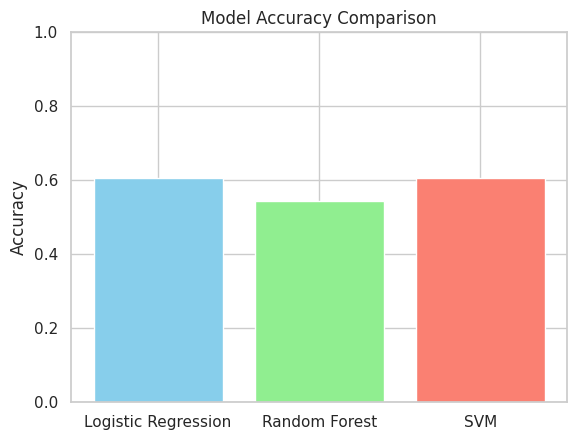

In [59]:
import matplotlib.pyplot as plt

models = ['Logistic Regression', 'Random Forest', 'SVM']
accuracies = [
    accuracy_score(y_test, log_pred),
    accuracy_score(y_test, rf_pred),
    accuracy_score(y_test, svm_pred)
]

plt.bar(models, accuracies, color=['skyblue', 'lightgreen', 'salmon'])
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.show()

**Hyperparameter Tuning using GridSearchCV**

In [61]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Step 1: Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],       # Number of trees
    'max_depth': [None, 5, 10],           # Tree depth
    'min_samples_split': [2, 5, 10],      # Min samples to split a node
}

In [62]:
# Step 2: Create base model
rf = RandomForestClassifier(random_state=42)

# Step 3: Create GridSearchCV
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=3,                       # 3-fold cross-validation
    scoring='accuracy',        
    n_jobs=-1,                 # Use all CPU cores
    verbose=1
)

In [63]:
# Step 4: Fit on training data
grid_search.fit(X_train, y_train)

# Step 5: Best parameters
print("Best Parameters:", grid_search.best_params_)

# Step 6: Best model
best_rf = grid_search.best_estimator_

Fitting 3 folds for each of 27 candidates, totalling 81 fits
Best Parameters: {'max_depth': 5, 'min_samples_split': 2, 'n_estimators': 50}


In [64]:
from sklearn.metrics import classification_report, accuracy_score

# Predict on test set
best_rf_pred = best_rf.predict(X_test)

# Evaluate
print("\nTuned Random Forest Results:")
print("Accuracy:", accuracy_score(y_test, best_rf_pred))
print("Classification Report:\n", classification_report(y_test, best_rf_pred))


Tuned Random Forest Results:
Accuracy: 0.6055


/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00      1578
           1       0.61      1.00      0.75      2422

    accuracy                           0.61      4000
   macro avg       0.30      0.50      0.38      4000
weighted avg       0.37      0.61      0.46      4000



**Model Evaluation Visuals**

1.Confusion Matrix

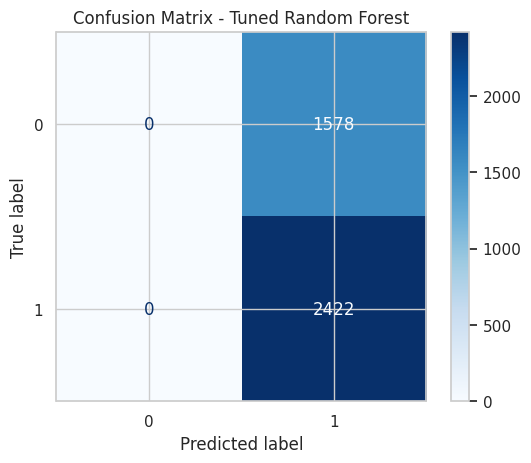

In [65]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Create confusion matrix
cm = confusion_matrix(y_test, best_rf_pred)

# Plot it
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_rf.classes_)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix - Tuned Random Forest")
plt.show()

2. ROC Curve and AUC Score

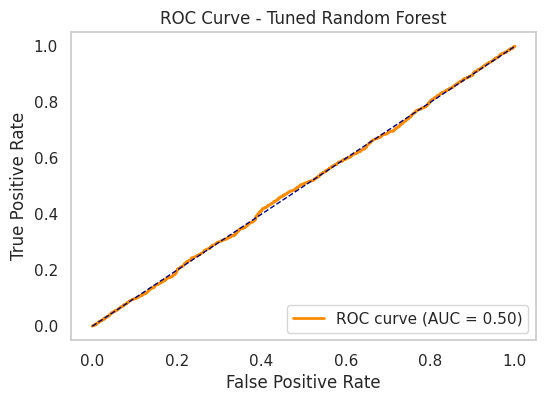

In [66]:
from sklearn.metrics import roc_curve, auc, RocCurveDisplay

# Get predicted probabilities for the positive class
y_probs = best_rf.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

# Plot ROC Curve
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Tuned Random Forest')
plt.legend(loc="lower right")
plt.grid()
plt.show()

In [69]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score

# Get probabilities for ROC AUC (only for models that support it)
rf_prob = best_rf.predict_proba(X_test)[:, 1]
rf_pred = best_rf.predict(X_test)
svm_prob = svm.predict_proba(X_test)[:, 1] if hasattr(svm, "predict_proba") else None

# Scores for each model
models = ["Logistic Regression", "Random Forest (Tuned)", "SVM"]
accuracy = [
    accuracy_score(y_test, log_pred),
    accuracy_score(y_test, rf_pred),
    accuracy_score(y_test, svm_pred)
]
f1 = [
    f1_score(y_test, log_pred),
    f1_score(y_test, rf_pred),
    f1_score(y_test, svm_pred)
]
auc = [
    roc_auc_score(y_test, log_reg.predict_proba(X_test)[:, 1]),
    roc_auc_score(y_test, rf_prob),
    roc_auc_score(y_test, svm.predict_proba(X_test)[:, 1]) if hasattr(svm, "predict_proba") else 0
]

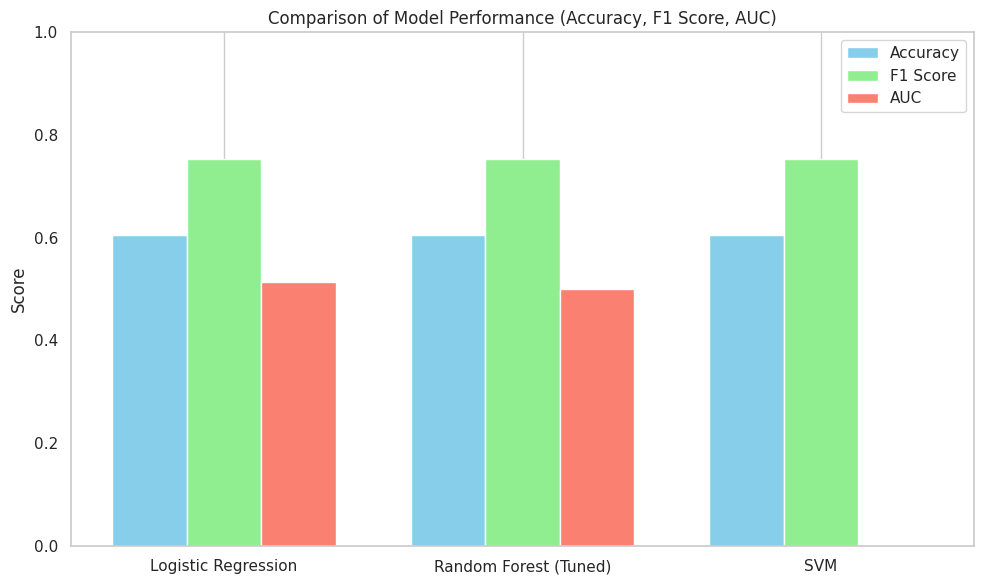

In [70]:
# Grouped bar chart
import numpy as np

x = np.arange(len(models))  # label locations
width = 0.25  # bar width

plt.figure(figsize=(10, 6))
plt.bar(x - width, accuracy, width, label='Accuracy', color='skyblue')
plt.bar(x, f1, width, label='F1 Score', color='lightgreen')
plt.bar(x + width, auc, width, label='AUC', color='salmon')

# Add labels and formatting
plt.ylabel('Score')
plt.ylim(0, 1)
plt.title("Comparison of Model Performance (Accuracy, F1 Score, AUC)")
plt.xticks(x, models)
plt.legend()
plt.grid(axis='y')
plt.tight_layout()
plt.show()

I add two more algorithms

In [71]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import (
    accuracy_score, f1_score, roc_auc_score, classification_report,
    confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc
)
import matplotlib.pyplot as plt
import numpy as np

**Train All 5 Models**

In [72]:
# Logistic Regression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
log_pred = log_reg.predict(X_test)
log_prob = log_reg.predict_proba(X_test)[:, 1]

# Tuned Random Forest (already trained)
rf_pred = best_rf.predict(X_test)
rf_prob = best_rf.predict_proba(X_test)[:, 1]

# SVM with probability
svm = SVC(probability=True)
svm.fit(X_train, y_train)
svm_pred = svm.predict(X_test)
svm_prob = svm.predict_proba(X_test)[:, 1]

# K-Nearest Neighbors
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)
knn_prob = knn.predict_proba(X_test)[:, 1]

# Naive Bayes
nb = GaussianNB()
nb.fit(X_train, y_train)
nb_pred = nb.predict(X_test)
nb_prob = nb.predict_proba(X_test)[:, 1]

**Evaluate All Models Individually**

In [73]:
def evaluate_model(name, y_true, y_pred, y_prob):
    print(f"\n=== {name} ===")
    print("Accuracy :", accuracy_score(y_true, y_pred))
    print("F1 Score :", f1_score(y_true, y_pred))
    print("ROC AUC  :", roc_auc_score(y_true, y_prob))
    print("Classification Report:\n", classification_report(y_true, y_pred))

evaluate_model("Logistic Regression", y_test, log_pred, log_prob)
evaluate_model("Random Forest (Tuned)", y_test, rf_pred, rf_prob)
evaluate_model("SVM", y_test, svm_pred, svm_prob)
evaluate_model("KNN", y_test, knn_pred, knn_prob)
evaluate_model("Naive Bayes", y_test, nb_pred, nb_prob)


=== Logistic Regression ===
Accuracy : 0.6055
F1 Score : 0.7542821550918717
ROC AUC  : 0.5143645229251507


/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00      1578
           1       0.61      1.00      0.75      2422

    accuracy                           0.61      4000
   macro avg       0.30      0.50      0.38      4000
weighted avg       0.37      0.61      0.46      4000


=== Random Forest (Tuned) ===
Accuracy : 0.6055
F1 Score : 0.7542821550918717
ROC AUC  : 0.5002556309453163


/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00      1578
           1       0.61      1.00      0.75      2422

    accuracy                           0.61      4000
   macro avg       0.30      0.50      0.38      4000
weighted avg       0.37      0.61      0.46      4000


=== SVM ===
Accuracy : 0.6045
F1 Score : 0.7535057650358367
ROC AUC  : 0.4922612113924011
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00      1578
           1       0.61      1.00      0.75      2422

    accuracy                           0.60      4000
   macro avg       0.30      0.50      0.38      4000
weighted avg       0.37      0.60      0.46      4000


=== KNN ===
Accuracy : 0.53675
F1 Score : 0.6388618203079321
ROC AUC  : 0.4989149421389691
Classification Report:
               precision    recall  f1-score   support

           0       0.39      0.32   

/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00      1578
           1       0.61      1.00      0.75      2422

    accuracy                           0.61      4000
   macro avg       0.30      0.50      0.38      4000
weighted avg       0.37      0.61      0.46      4000



**Visualize ROC Curves for All Models**

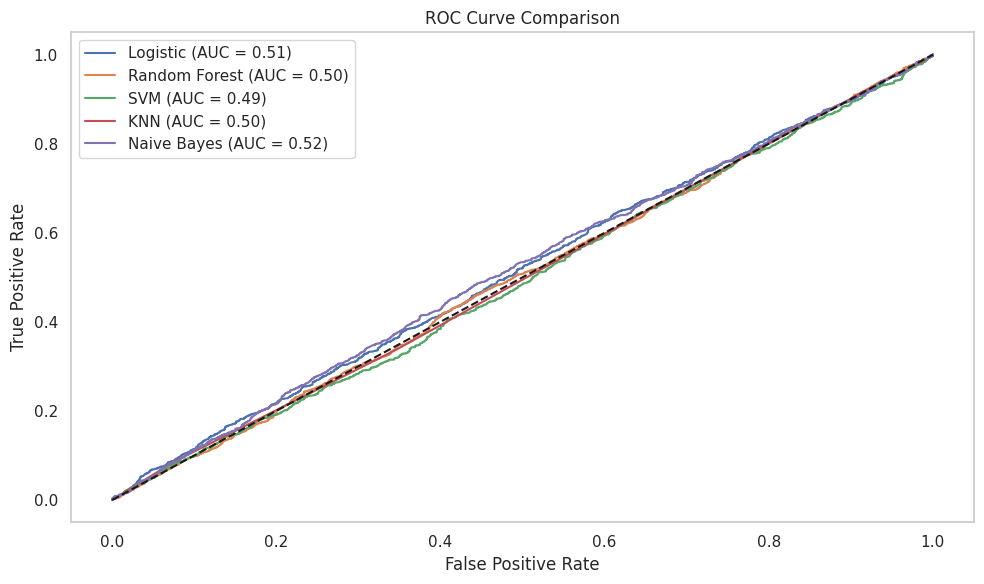

In [74]:
plt.figure(figsize=(10, 6))

# Compute ROC curves and plot
fpr_log, tpr_log, _ = roc_curve(y_test, log_prob)
fpr_rf, tpr_rf, _ = roc_curve(y_test, rf_prob)
fpr_svm, tpr_svm, _ = roc_curve(y_test, svm_prob)
fpr_knn, tpr_knn, _ = roc_curve(y_test, knn_prob)
fpr_nb, tpr_nb, _ = roc_curve(y_test, nb_prob)

plt.plot(fpr_log, tpr_log, label="Logistic (AUC = %.2f)" % roc_auc_score(y_test, log_prob))
plt.plot(fpr_rf, tpr_rf, label="Random Forest (AUC = %.2f)" % roc_auc_score(y_test, rf_prob))
plt.plot(fpr_svm, tpr_svm, label="SVM (AUC = %.2f)" % roc_auc_score(y_test, svm_prob))
plt.plot(fpr_knn, tpr_knn, label="KNN (AUC = %.2f)" % roc_auc_score(y_test, knn_prob))
plt.plot(fpr_nb, tpr_nb, label="Naive Bayes (AUC = %.2f)" % roc_auc_score(y_test, nb_prob))

plt.plot([0, 1], [0, 1], 'k--')  # Random baseline
plt.title("ROC Curve Comparison")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

**Create Grouped Bar Chart to Compare All Models**

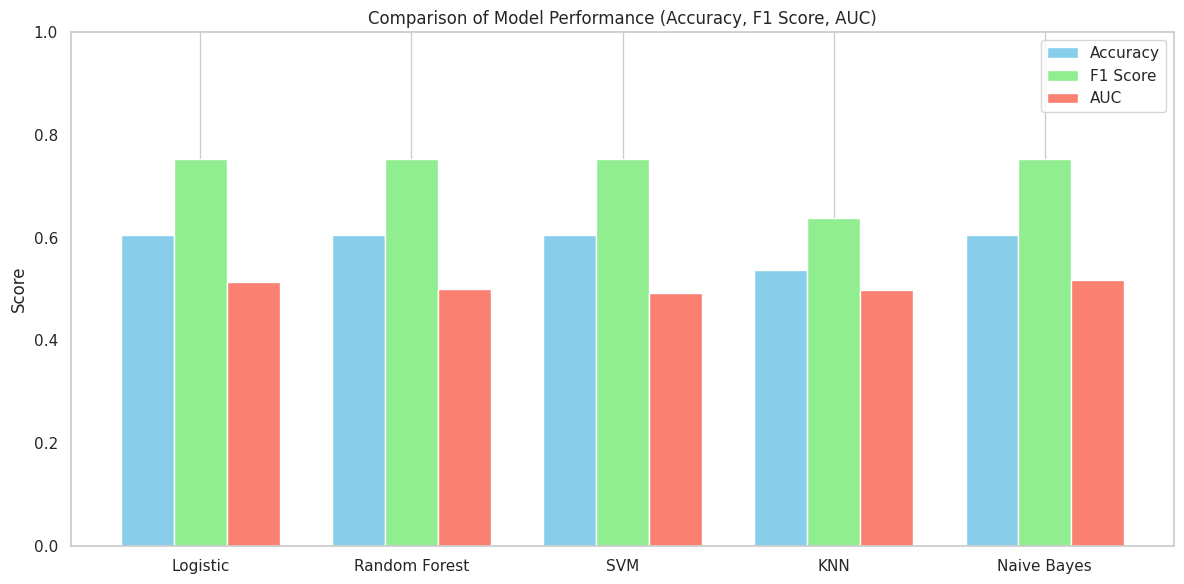

In [75]:
# Collect scores
models = ["Logistic", "Random Forest", "SVM", "KNN", "Naive Bayes"]
accuracies = [
    accuracy_score(y_test, log_pred),
    accuracy_score(y_test, rf_pred),
    accuracy_score(y_test, svm_pred),
    accuracy_score(y_test, knn_pred),
    accuracy_score(y_test, nb_pred),
]
f1_scores = [
    f1_score(y_test, log_pred),
    f1_score(y_test, rf_pred),
    f1_score(y_test, svm_pred),
    f1_score(y_test, knn_pred),
    f1_score(y_test, nb_pred),
]
aucs = [
    roc_auc_score(y_test, log_prob),
    roc_auc_score(y_test, rf_prob),
    roc_auc_score(y_test, svm_prob),
    roc_auc_score(y_test, knn_prob),
    roc_auc_score(y_test, nb_prob),
]

# Plot grouped bars
x = np.arange(len(models))
width = 0.25

plt.figure(figsize=(12, 6))
plt.bar(x - width, accuracies, width, label="Accuracy", color="skyblue")
plt.bar(x, f1_scores, width, label="F1 Score", color="lightgreen")
plt.bar(x + width, aucs, width, label="AUC", color="salmon")

plt.xticks(x, models)
plt.ylim(0, 1)
plt.ylabel("Score")
plt.title("Comparison of Model Performance (Accuracy, F1 Score, AUC)")
plt.legend()
plt.grid(axis='y')
plt.tight_layout()
plt.show()

**Model Deployment (Web App)**

1.Save the model and scaler

In [76]:
import joblib

joblib.dump(best_rf, "best_rf_model.pkl")
joblib.dump(scaler, "scaler.pkl")  

['scaler.pkl']

2.Create streamlit_app.py

In [7]:
import pandas as pd

df = pd.read_csv("Cleaned_Train.csv")
print(df.columns)

Index(['Alcohol Consumption', 'Cancer Stage', 'Country', 'Date of Birth',
       'Diabetes', 'Diabetes History', 'Diet Risk', 'Early Detection',
       'Family History', 'Gender', 'Genetic Mutation', 'Healthcare Access',
       'Healthcare Costs', 'Heart Disease History', 'Hypertension',
       'Incidence Rate per 100K', 'Inflammatory Bowel Disease',
       'Insurance Costs', 'Insurance Status', 'Mortality Rate per 100K',
       'Non Smoker', 'Obesity BMI', 'Physical Activity', 'Screening History',
       'Smoking History', 'Transfusion History', 'Treatment Type',
       'Tumor Size (mm)', 'Urban or Rural', 'Survival Prediction'],
      dtype='object')
